In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    r'/content/drive/MyDrive/Apple leaf dataset/data',
    shuffle = True,
    image_size = (256,256),
    batch_size = 32,
)

Found 1730 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['healthy', 'rust', 'scab']

In [ ]:
len(dataset)

55

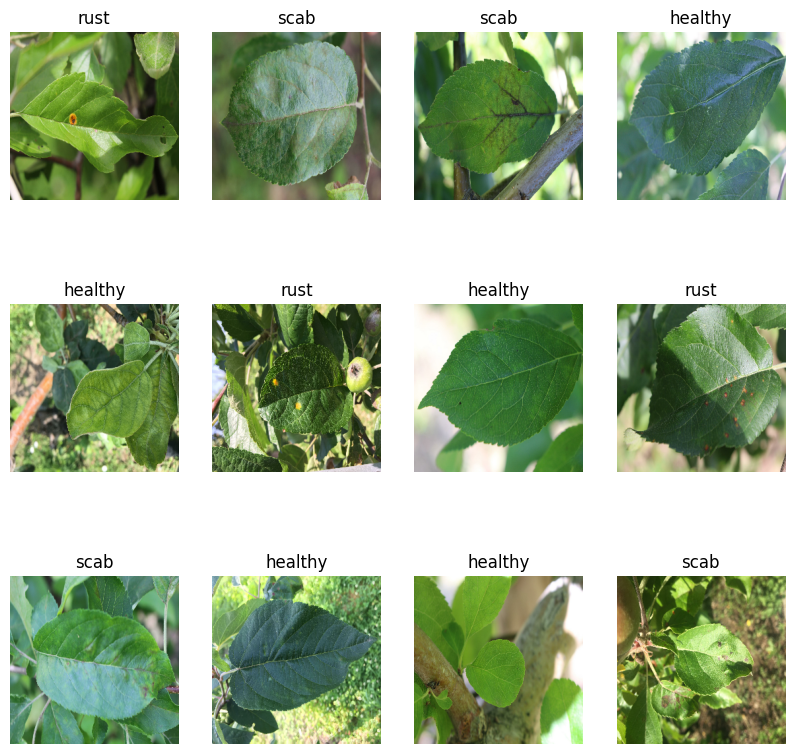

In [ ]:
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
  #print(image_batch[0].shape)
  #print(label_batch.numpy())
 for i in range(12):
  ax = plt.subplot(3,4,i+1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[label_batch[i]])
  plt.axis("off")

In [ ]:
train_size = 0.8
len(dataset)* train_size

44.0

In [ ]:
train_ds = dataset.take(44)
len(train_ds)

44

In [ ]:
test_ds = dataset.skip(44)
len(test_ds)

11

In [ ]:
val_size = 0.1
len(dataset)*val_size

5.5

In [ ]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [ ]:
test_ds = test_ds.skip(5)
len(test_ds)

6

In [ ]:
def get_dataset_partitions_tf(ds , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle = True , shuffle_size = 1000):

  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size , seed = 12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

44

In [ ]:
len(val_ds)

5

In [ ]:
len(test_ds)

6

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([ # Correct Sequential class name
     layers.Rescaling(1.0/255), # Correct typo
     layers.Resizing(256,256) # Correct typo
])

In [ ]:
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), # Corrected layer name
    layers.RandomRotation(0.2)
])

In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])
model.build(input_shape = (32,256,256,3))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_ds,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.3479 - loss: 1.0963 - val_accuracy: 0.5875 - val_loss: 0.9194
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.6445 - loss: 0.8140 - val_accuracy: 0.7625 - val_loss: 0.5311
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.7820 - loss: 0.5242 - val_accuracy: 0.7812 - val_loss: 0.4793
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.8027 - loss: 0.4483 - val_accuracy: 0.7188 - val_loss: 0.5007
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.8386 - loss: 0.3722 - val_accuracy: 0.8250 - val_loss: 0.3735
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.8753 - loss: 0.3234 - val_accuracy: 0.8750 - val_loss: 0.3059
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.9072 - loss: 0.2277 - val_accuracy: 0.9062 - val_loss: 0.2461
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.9427 - loss: 0.1704 - val_accuracy: 0.9000 - v

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 941ms/step - accuracy: 0.9353 - loss: 0.1196
Test Accuracy: 96.35%


In [ ]:
scores = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9353 - loss: 0.1196


In [ ]:
scores

[0.09412447363138199, 0.9635416865348816]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 44}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
len(history.history['accuracy'])

20

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

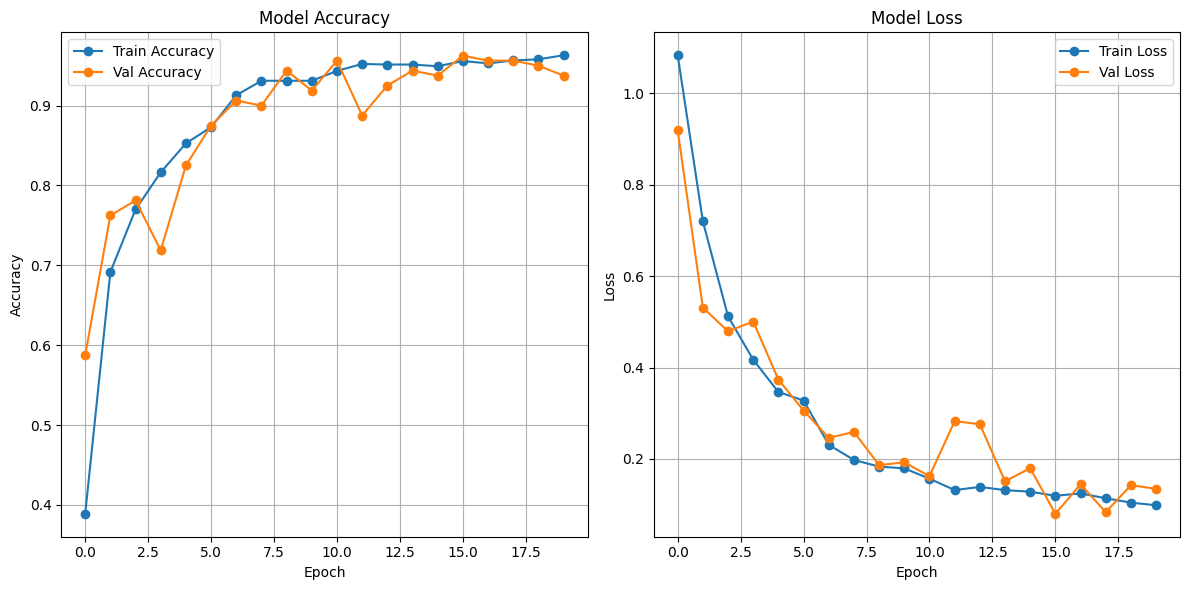

In [ ]:
import matplotlib.pyplot as plt

# Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 920ms/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.98      0.91      0.94        65
        Rust       1.00      0.98      0.99        60
        Scab       0.92      1.00      0.96        67

    accuracy                           0.96       192
   macro avg       0.97      0.96      0.96       192
weighted avg       0.97      0.96      0.96       192



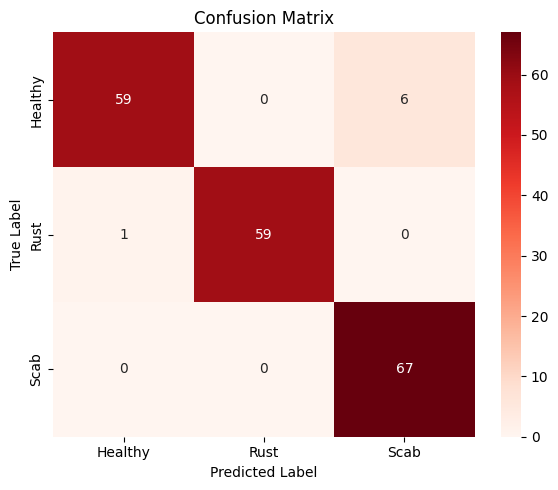

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



y_true = np.concatenate([labels.numpy() for _, labels in test_ds])
y_pred = np.argmax(model.predict(test_ds), axis=1)


# 🔹 Step 1: Predict on the test dataset
y_pred = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred, axis=1)  # predicted labels

# 🔹 Step 2: Get true labels from test dataset
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# 🔹 Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)
class_names = ['Healthy', 'Rust', 'Scab']  # ← Change according to your class names

# 🔹 Step 4: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_names))

# 🔹 Step 5: Plotting Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names,
            yticklabels=class_names)


#print("Predicted shape:", y_pred_labels.shape)
#print("True shape:", y_true.shape)
#assert len(y_pred_labels) == len(y_true)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1282335682.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3283 - loss: 1.3808 - val_accuracy: 0.4437 - val_loss: 1.0630
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4180 - loss: 1.1420 - val_accuracy: 0.5688 - val_loss: 0.9681
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4953 - loss: 1.0196 - val_accuracy: 0.5375 - val_loss: 0.9301
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5067 - loss: 1.0078 - val_accuracy: 0.6313 - val_loss: 0.8994
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5661 - loss: 0.9291 - val_accuracy: 0.6187 - val_loss: 0.8920
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5589 - loss: 0.9280 - val_accuracy: 0.5625 - val_loss: 0.8934
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5490 - loss: 0.9459 - val_accuracy: 0.6000 - val_loss: 0.8731
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6037 

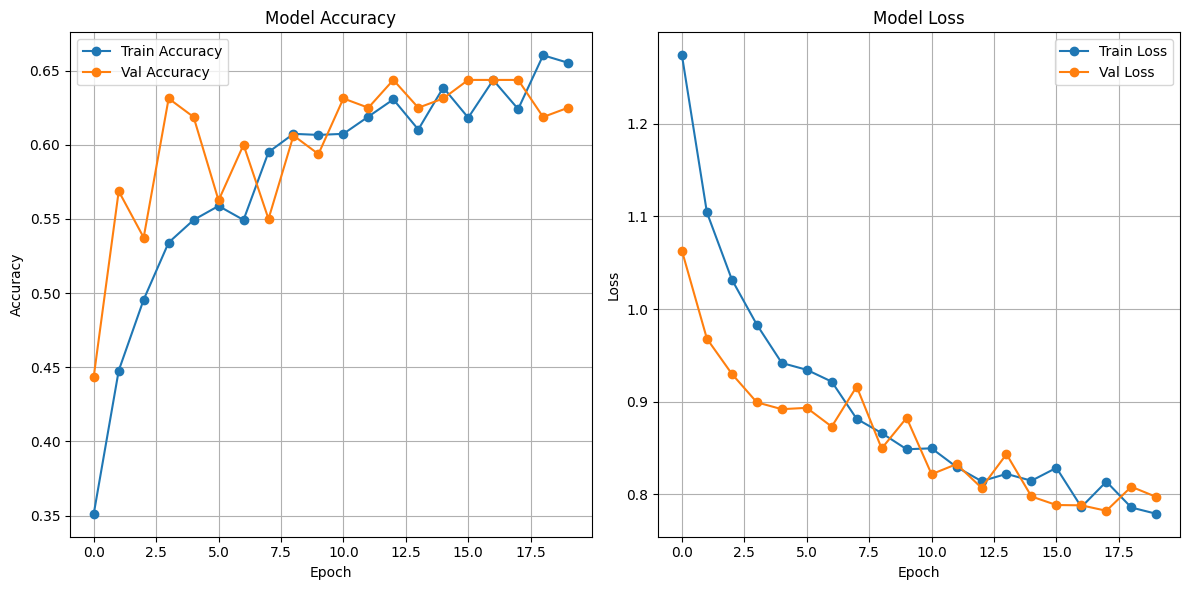

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.61      0.83      0.71        65
        Rust       0.74      0.53      0.62        60
        Scab       0.70      0.64      0.67        67

    accuracy                           0.67       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.69      0.67      0.67       192



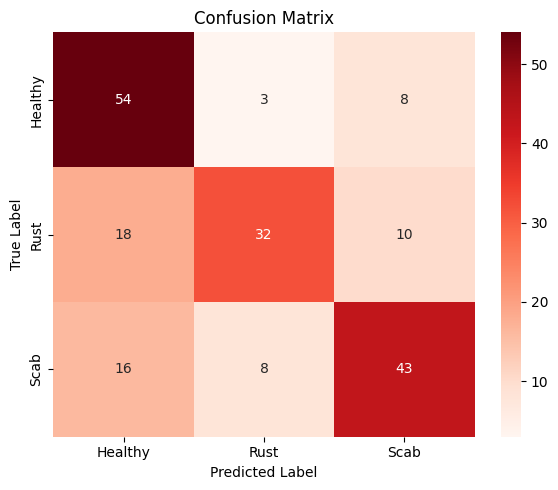

In [ ]:

from tensorflow.keras.applications import MobileNetV2



# 🔹 Load MobileNetV2 model without top
base_model = MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model

# 🔹 Build the complete model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes: Healthy, Rust, Scab
])

# 🔹 Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 🔹 Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

# Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



y_true = np.concatenate([labels.numpy() for _, labels in test_ds])
y_pred = np.argmax(model.predict(test_ds), axis=1)


# 🔹 Step 1: Predict on the test dataset
y_pred = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred, axis=1)  # predicted labels

# 🔹 Step 2: Get true labels from test dataset
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# 🔹 Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)
class_names = ['Healthy', 'Rust', 'Scab']  # ← Change according to your class names

# 🔹 Step 4: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_names))

# 🔹 Step 5: Plotting Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names,
            yticklabels=class_names)


#print("Predicted shape:", y_pred_labels.shape)
#print("True shape:", y_true.shape)
#assert len(y_pred_labels) == len(y_true)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 341s 8s/step - accuracy: 0.5133 - loss: 1.0050 - val_accuracy: 0.7625 - val_loss: 0.6196
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 338s 8s/step - accuracy: 0.7417 - loss: 0.6492 - val_accuracy: 0.8188 - val_loss: 0.4968
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 380s 9s/step - accuracy: 0.7954 - loss: 0.5126 - val_accuracy: 0.8375 - val_loss: 0.4400
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 334s 8s/step - accuracy: 0.7999 - loss: 0.4771 - val_accuracy: 0.7750 - val_loss: 0.4556
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 336s 8s/step - accuracy: 0.8157 - loss: 0.4656 - val_accuracy: 0.8750 - val_loss: 0.3861
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 332s 8s/step - accuracy: 0.8391 - loss: 0.4018 - val_accuracy: 0.8687 - val_loss: 0.3553
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.8569 - loss: 0.3576 - val_accuracy: 0.8750 - val_loss: 0.3689
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 338s 8s/step - accurac

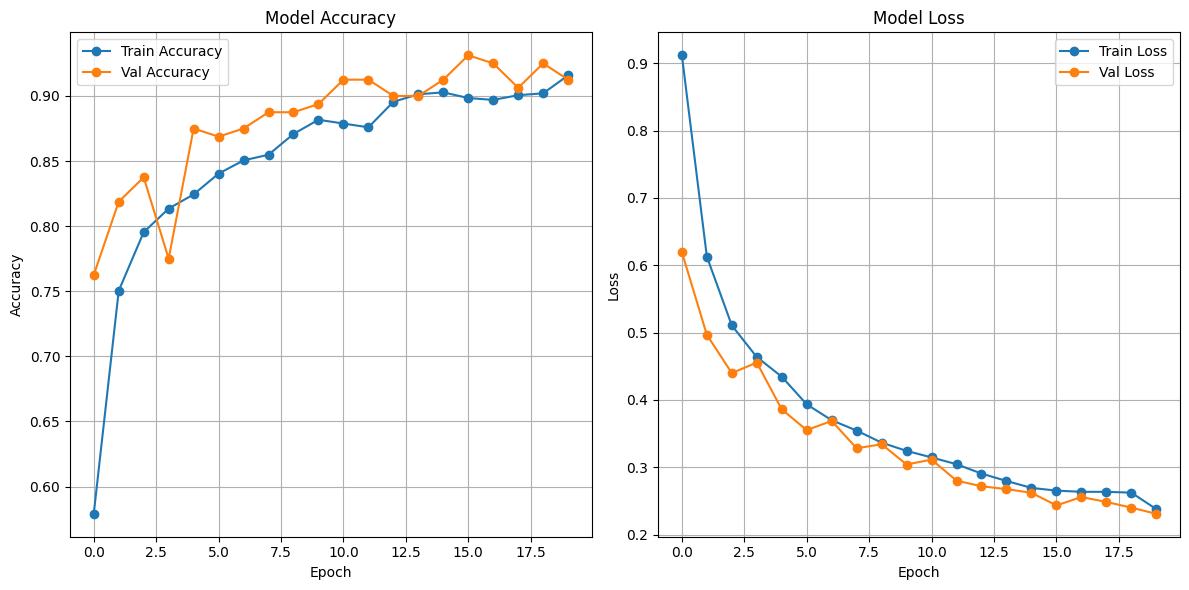

6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.92      1.00      0.96        65
        Rust       0.98      0.90      0.94        60
        Scab       0.98      0.97      0.98        67

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192



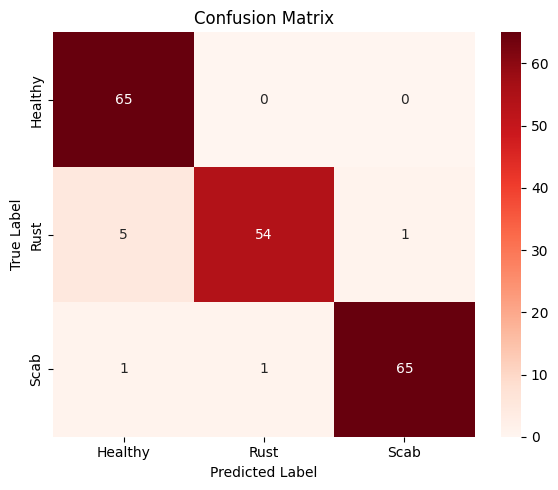

In [ ]:

from tensorflow.keras.applications import ResNet50



# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes: Healthy, Rust, Scab
])

# Compile the model
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

# Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



y_true = np.concatenate([labels.numpy() for _, labels in test_ds])
y_pred = np.argmax(model.predict(test_ds), axis=1)


# 🔹 Step 1: Predict on the test dataset
y_pred = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred, axis=1)  # predicted labels

# 🔹 Step 2: Get true labels from test dataset
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# 🔹 Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)
class_names = ['Healthy', 'Rust', 'Scab']  # ← Change according to your class names

# 🔹 Step 4: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_names))

# 🔹 Step 5: Plotting Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names,
            yticklabels=class_names)


#print("Predicted shape:", y_pred_labels.shape)
#print("True shape:", y_true.shape)
#assert len(y_pred_labels) == len(y_true)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.5273 - loss: 0.9627 - val_accuracy: 0.8062 - val_loss: 0.6555
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.7692 - loss: 0.6179 - val_accuracy: 0.8062 - val_loss: 0.5373
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.8365 - loss: 0.5002 - val_accuracy: 0.8375 - val_loss: 0.4617
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.8279 - loss: 0.4610 - val_accuracy: 0.8687 - val_loss: 0.4119
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.8743 - loss: 0.3726 - val_accuracy: 0.8813 - val_loss: 0.3812
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8382 - loss: 0.4154 - val_accuracy: 0.8875 - val_loss: 0.3544
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.8791 - loss: 0.3506 - val_accuracy: 0.9000 - val_loss: 0.3314
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accurac

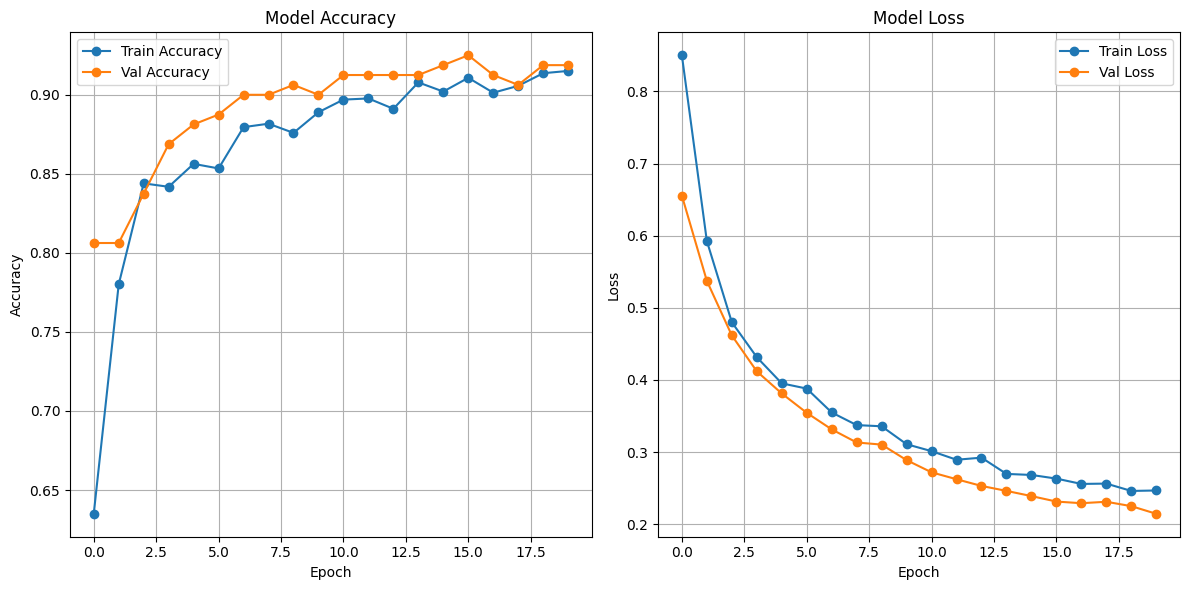

6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.94      0.95      0.95        65
        Rust       0.97      0.98      0.98        60
        Scab       0.95      0.93      0.94        67

    accuracy                           0.95       192
   macro avg       0.95      0.95      0.95       192
weighted avg       0.95      0.95      0.95       192

Predicted shape: (192,)
True shape: (192,)


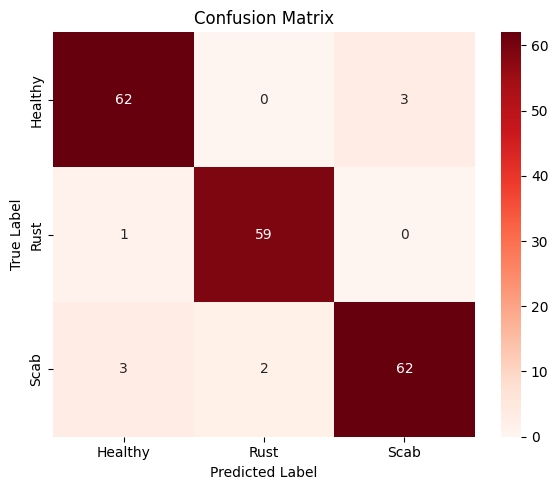

In [ ]:


from tensorflow.keras.applications import EfficientNetB0


base_model = EfficientNetB0(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze pretrained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

# Accuracy and Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



y_true = np.concatenate([labels.numpy() for _, labels in test_ds])
y_pred = np.argmax(model.predict(test_ds), axis=1)


# 🔹 Step 1: Predict on the test dataset
y_pred = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred, axis=1)  # predicted labels

# 🔹 Step 2: Get true labels from test dataset
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# 🔹 Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)
class_names = ['Healthy', 'Rust', 'Scab']  # ← Change according to your class names

# 🔹 Step 4: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels, target_names=class_names))

# 🔹 Step 5: Plotting Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names,
            yticklabels=class_names)


print("Predicted shape:", y_pred_labels.shape)
print("True shape:", y_true.shape)
assert len(y_pred_labels) == len(y_true)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()